Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.rcParams['figure.figsize']=[15,8]

### Q1. Load the dataset 

In [3]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [4]:
df.describe(include="all")

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S01_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


In [5]:
#As it seems there is no missing values.
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [6]:
df.status.value_counts() #yes data is imbalanced.

1    147
0     48
Name: status, dtype: int64

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [7]:
#no missing values

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

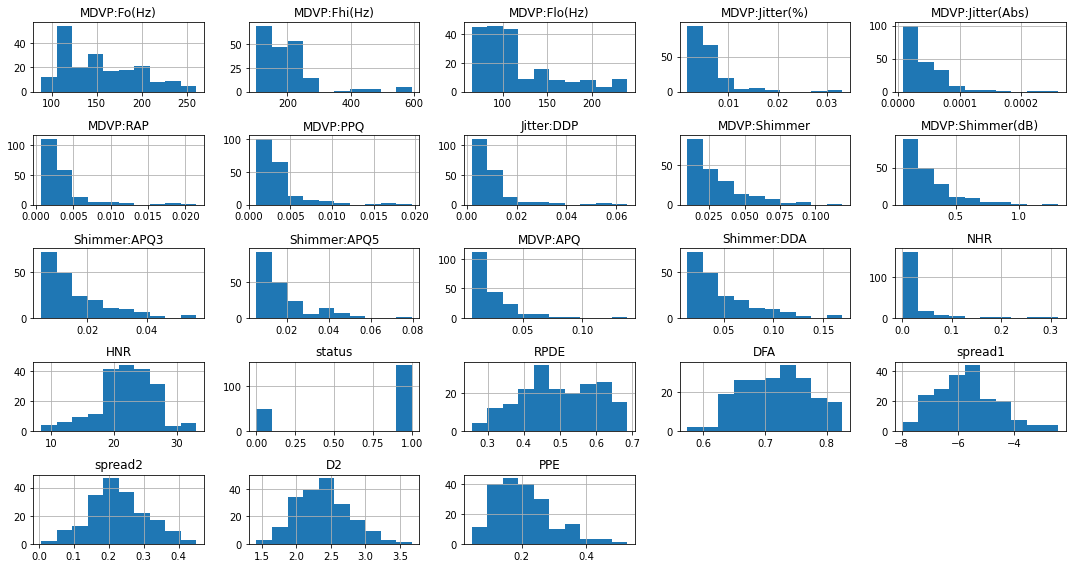

In [8]:
df.hist()

plt.tight_layout()

In [9]:
df.skew()

C:\Users\CHIRAY~1\AppData\Local\Temp/ipykernel_11304/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [10]:
#Some of the distribution is not normal.

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

<AxesSubplot:>

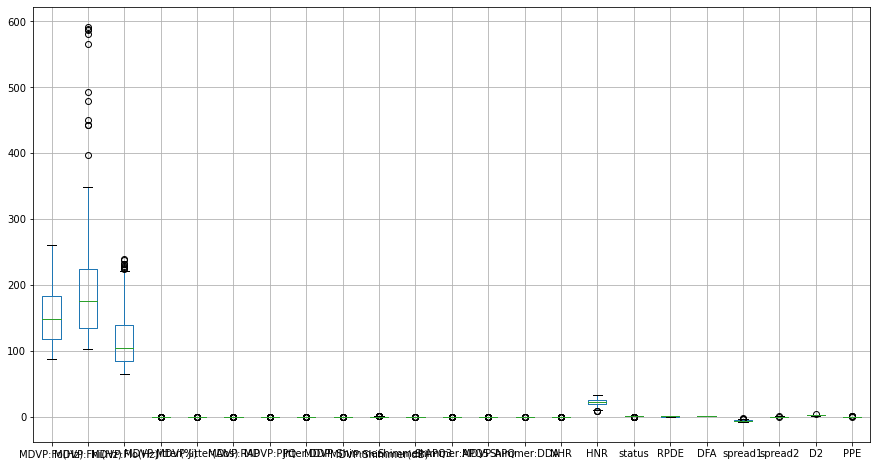

In [11]:
df.boxplot()

<AxesSubplot:>

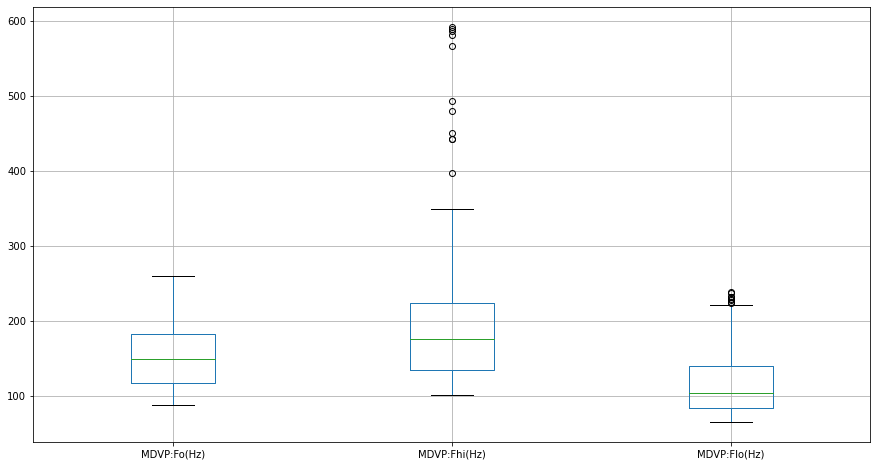

In [12]:
df.iloc[:,:4].boxplot()

<AxesSubplot:>

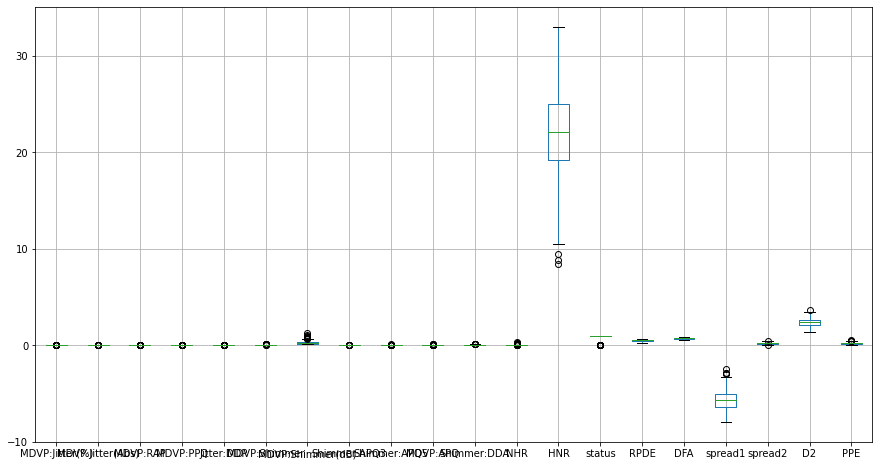

In [13]:
df.iloc[:,4:].boxplot()

In [14]:
#Yes there are outliers but they are close to upper whicker.
#Column "MDVP:Fhi:" has the largest outliers.
#winsorization technique should be applied.

C:\Users\Chirayu Kale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HNR'>

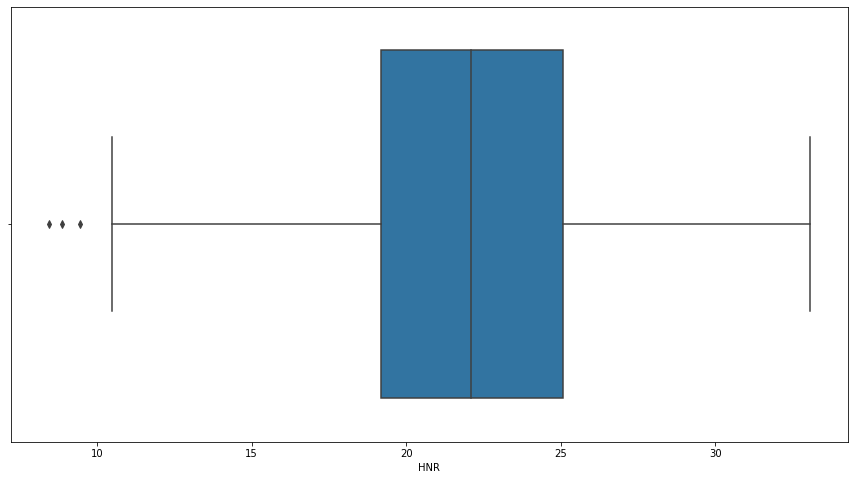

In [15]:
sns.boxplot(df.HNR)

In [16]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1

UL=Q3+1.5*IQR

LL=Q1-1.5*IQR


In [17]:
LL

MDVP:Fo(Hz)         19.776500
MDVP:Fhi(Hz)         0.848000
MDVP:Flo(Hz)         0.699750
MDVP:Jitter(%)      -0.002397
MDVP:Jitter(Abs)    -0.000040
MDVP:RAP            -0.001602
MDVP:PPQ            -0.001283
Jitter:DDP          -0.004795
MDVP:Shimmer        -0.015565
MDVP:Shimmer(dB)    -0.153750
Shimmer:APQ3        -0.009785
Shimmer:APQ5        -0.009620
MDVP:APQ            -0.011400
Shimmer:DDA         -0.029355
NHR                 -0.023648
HNR                 10.381750
status               1.000000
RPDE                 0.171921
DFA                  0.544072
spread1             -8.555952
spread2              0.017025
D2                   1.293130
PPE                 -0.035842
dtype: float64

In [18]:
df.replace(to_replace=df[df<LL].any(axis=1),value=LL,inplace=True)
df.replace(to_replace=df[df>UL].any(axis=1),value=UL,inplace=True)

C:\Users\CHIRAY~1\AppData\Local\Temp/ipykernel_11304/3444477703.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df.replace(to_replace=df[df<LL].any(axis=1),value=LL,inplace=True)
C:\Users\CHIRAY~1\AppData\Local\Temp/ipykernel_11304/3444477703.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df.replace(to_replace=df[df>UL].any(axis=1),value=UL,inplace=True)


### Q7. Are there any strong correlations among the independent features?

C:\Users\CHIRAY~1\AppData\Local\Temp/ipykernel_11304/3963211906.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop(["name",'status'],1)


<AxesSubplot:>

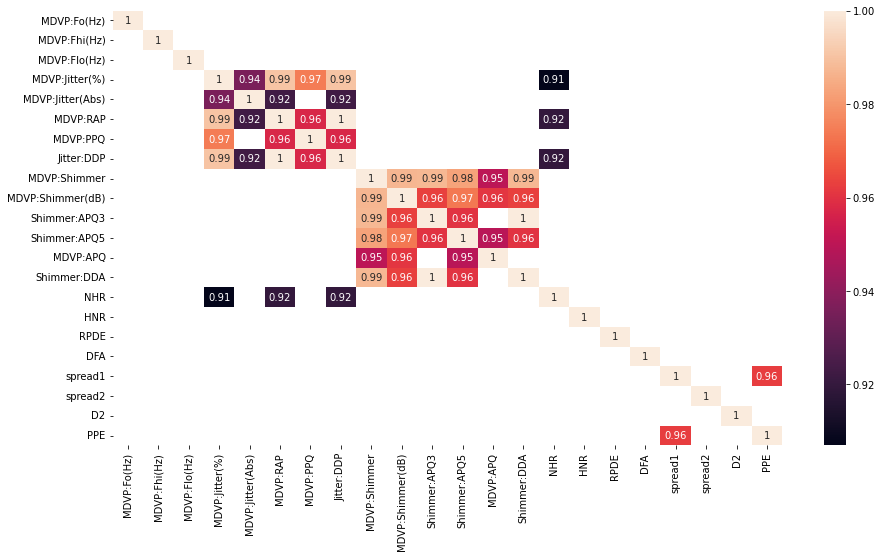

In [19]:
X=df.drop(["name",'status'],1)
y=df['status']


sns.heatmap(X.corr()[np.abs(X.corr())>0.9],annot=True)


#Yes there are mutlicolinearity in datasets

In [20]:
x_vif=X.copy()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [22]:
for i in range(X.shape[1]):
    vif=pd.DataFrame()
    vif['Features']=x_vif.columns
    
    vif['vif']=[variance_inflation_factor(x_vif.values,i) for i in range(x_vif.shape[1])]
    
    multi=vif[vif.vif>10]
    
    if multi.empty==False:
        sort_df=multi.sort_values(by='vif',ascending=False)
    else :
        print(vif)
        break
        
    if sort_df.empty==False:
        x_vif.drop(sort_df.Features.iloc[0],1,inplace=True)
    else:
        print(vif)
        break

       Features       vif
0  MDVP:Fhi(Hz)  4.993086
1  MDVP:Flo(Hz)  5.143152
2   Shimmer:DDA  7.113060
3           NHR  2.807437
4       spread2  6.920066


C:\Users\CHIRAY~1\AppData\Local\Temp/ipykernel_11304/2942490161.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_vif.drop(sort_df.Features.iloc[0],1,inplace=True)


### Q8. Split dataset into training & test dataset  

In [23]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x_vif,y,random_state=1,test_size=0.2)

### Q9. Create a default decision tree model using criterion = Entropy 

In [24]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt9=DecisionTreeClassifier(criterion='entropy')

dt9.fit(xtrain,ytrain)

y_pred=dt9.predict(xtest)

accuracy_score(ytest,y_pred)

0.9230769230769231

### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [26]:
from sklearn.model_selection import GridSearchCV
param=[{"max_depth": np.arange(2,20),"min_samples_leaf": np.arange(1,10),'criterion':['gini','entropy']}]
dt10=DecisionTreeClassifier(random_state=10)

grid=GridSearchCV(estimator=dt10,param_grid=param,cv=5,scoring='accuracy',)

grid.fit(xtrain,ytrain)

grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

In [27]:
dt11=DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,criterion='gini')

dt11.fit(xtrain,ytrain)

y_pred=dt11.predict(xtest)

accuracy_score(ytest,y_pred)

#Accuracy has incresed.

0.9230769230769231

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [28]:
from sklearn.ensemble import RandomForestClassifier


In [29]:
rf11=RandomForestClassifier(random_state=10)

param=[{'n_estimators':np.arange(1,50)}]

grid=GridSearchCV(estimator=rf11,param_grid=param,scoring='accuracy')

grid.fit(xtrain,ytrain)

grid.best_params_

{'n_estimators': 16}

In [30]:
rf12=RandomForestClassifier(n_estimators=16,random_state=10)

rf12.fit(xtrain,ytrain)

y_pred=rf12.predict(xtest)

accuracy_score(ytest,y_pred)

#Accuracy od decision trees is more.

0.8974358974358975